# Training Material: Monitoring Toyota Motor Corporation's Nagoya Port Facility with ALOS-2/PALSAR-2

This training material guides you through visualizing preprocessed ALOS-2 SAR images using Python.

## Module 1: Visualize the preprocessed ALOS-2 images

### 1.1 Reading and Visualizing Preprocessed ALOS-2 Images

#### 1.1.1. Setting up the Environment

In [1]:
pip install rasterio matplotlib gdal numpy


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


#### 1.1.2. Loading preprocessed ALOS-2 Data

In [2]:
import os
import matplotlib.pyplot as plt
import rasterio

# Folder containing the GeoTIFF images
folder_path = "/home/jovyan/shared/genAI/3_sirin/preprocessed"
preprocessed_images = [os.path.join(folder_path, f) for f in os.listdir(folder_path) if f.endswith('.tif')]

#### 1.1.3 Visualizing Multiple Images for Comparison

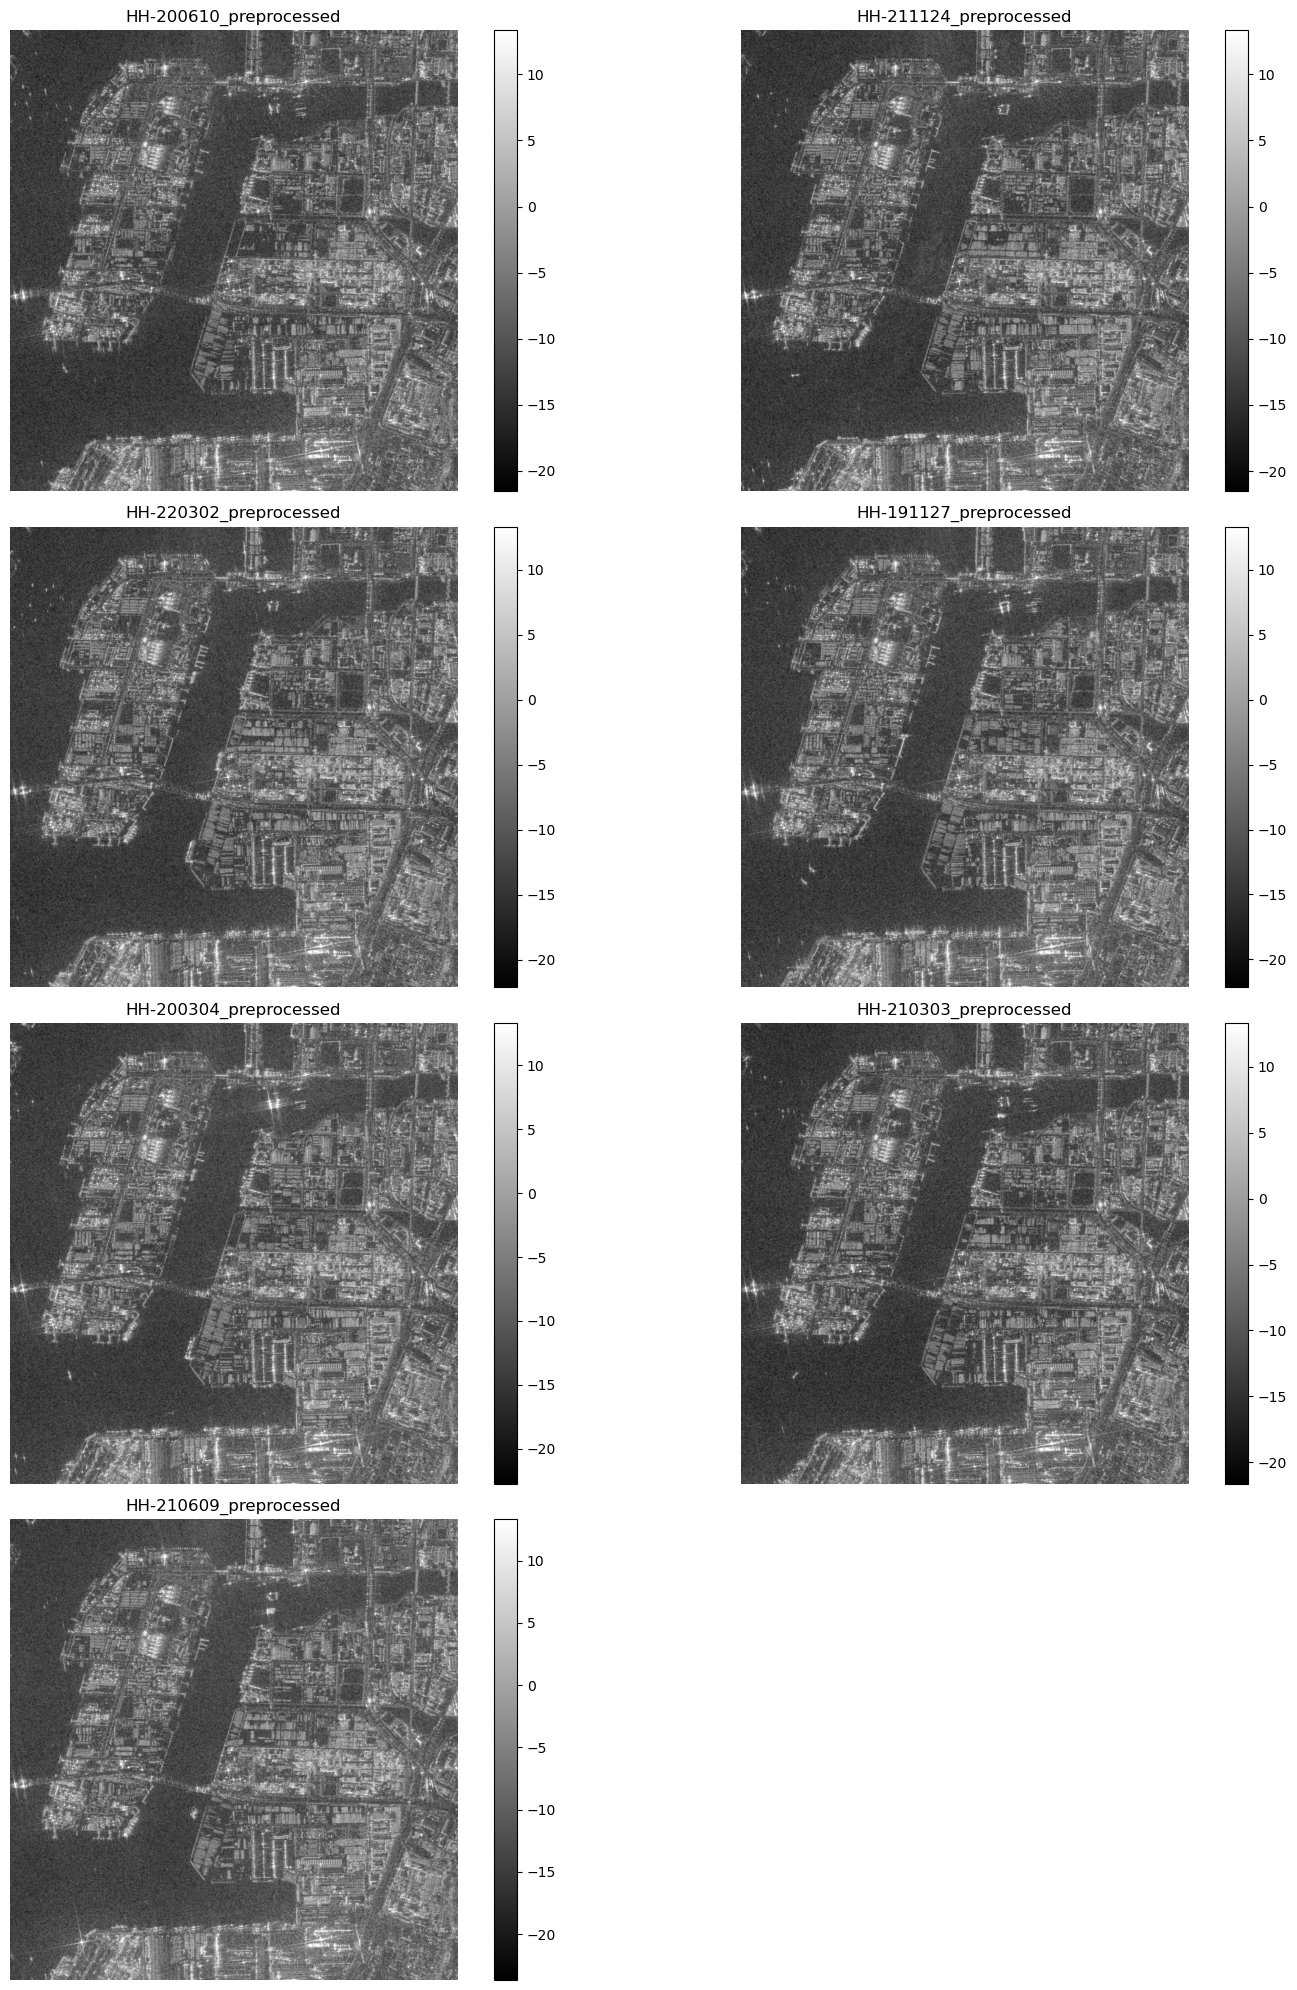

In [3]:
# Choose a color map
color_map = 'gray'  # You can change the color map as needed

# Determine number of rows needed for the subplots
num_images = len(preprocessed_images)
num_columns = 2
num_rows = (num_images + num_columns - 1) // num_columns  # Ceiling division to get rows

# Create a figure with subplots
plt.figure(figsize=(15, num_rows * 5))  # Adjust figure size based on the number of rows

# Loop through each preprocessed file and add it to the subplot.
for i, image_path in enumerate(preprocessed_images):
    # Open the image with rasterio
    with rasterio.open(image_path) as src:
        image_data = src.read(1)  # Read the first band of the raster

    # Create a subplot for each image
    plt.subplot(num_rows, num_columns, i + 1)
    plt.imshow(image_data, cmap=color_map)
    plt.colorbar()
    plt.title(os.path.basename(image_path).replace('.tif', ''))
    plt.axis("off")

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


## Module 2: Visualizing Change with ALOS-2 Data Color Composites

This training material will guide users through the process of creating and interpreting color composites from ALOS-2 data to visualize changes over time.

### 2.1. Reading and Visualizing ALOS-2 Data

**Setting up the Environment**

- Installing necessary libraries (rasterio, matplotlib, numpy, gdal).
- Basic Python review: The code uses basic Python constructs, such as file paths, statements, and functions, to handle data and visualize it.

**Loading ALOS-2 Data**

- The code explicitly demonstrates loading individual bands (HH polarization from three different dates) using rasterio.open and the .read(1) method. This fulfills the hands-on example requirement.

**Basic Visualization**

- The code uses matplotlib.pyplot to visualize each band separately with appropriate colormaps (Reds, Greens, Blues). It provides a hands-on example with titles, colormaps, and color bars.

In [6]:
!pip install rasterio matplotlib numpy gdal scipy


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


In [7]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt

In [9]:
# Paths to the images for the RGB channels
# Set these to your specific files or modify to load bands from a single multi-band file
red_band_path = "/home/jovyan/shared/genAI/3_sirin/preprocessed/HH-191127_preprocessed.tif"
green_band_path = "/home/jovyan/shared/genAI/3_sirin/preprocessed/HH-200610_preprocessed.tif"
blue_band_path = "/home/jovyan/shared/genAI/3_sirin/preprocessed/HH-200610_preprocessed.tif"

# Open each band and read the data
with rasterio.open(red_band_path) as red_src:
    red = red_src.read(1)  # Read the red band

with rasterio.open(green_band_path) as green_src:
    green = green_src.read(1)  # Read the green band

with rasterio.open(blue_band_path) as blue_src:
    blue = blue_src.read(1)  # Read the blue band

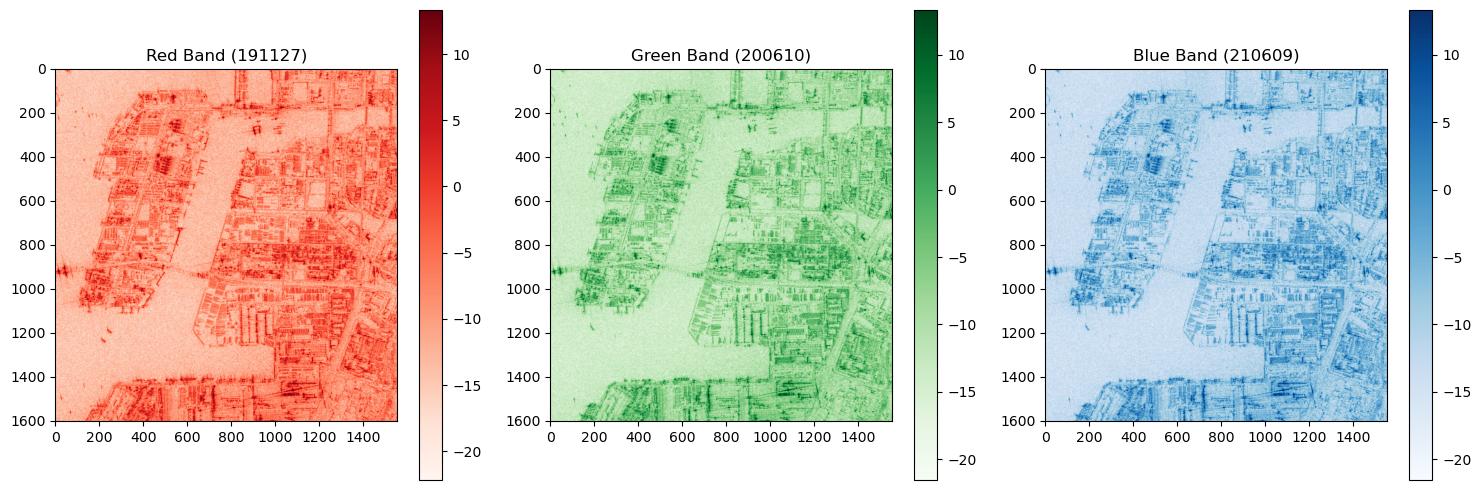

In [10]:
# Display the individual bands
plt.figure(figsize=(15, 5))

# Red Band
plt.subplot(1, 3, 1)
plt.imshow(red, cmap='Reds')
plt.title('Red Band (191127)')
plt.colorbar()

# Green Band
plt.subplot(1, 3, 2)
plt.imshow(green, cmap='Greens')
plt.title('Green Band (200610)')
plt.colorbar()

# Blue Band
plt.subplot(1, 3, 3)
plt.imshow(blue, cmap='Blues')
plt.title('Blue Band (210609)')
plt.colorbar()

plt.tight_layout()
plt.show()



### 2.2. Creating Color Composites for Change Detection

**Generating RGB Composites**

- Assign different time points to RGB channels, e.g., Red: Date 1, Green: Date 2, Blue: Date 3 or a synthetic band.
- Use numpy.stack (or numpy.dstack) to combine the three bands into an RGB composite.
- Normalize the image data using either a simple range-based method (min-max scaling) or percentile-based contrast stretching for better visualization.

In [11]:
# Stack the bands into an RGB image array
rgb_image = np.stack([red, green, blue], axis=-1)

# Normalize the bands for better visualization (optional)
rgb_image = (rgb_image - rgb_image.min()) / (rgb_image.max() - rgb_image.min())  # Normalize to [0, 1]

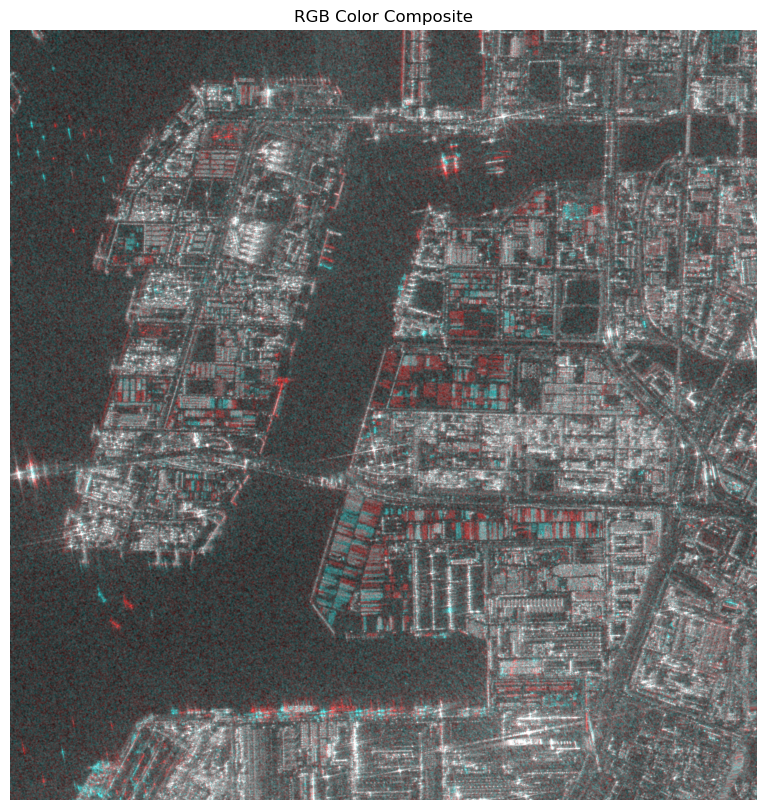

In [12]:
# Display the RGB composite
plt.figure(figsize=(10, 10))
plt.imshow(rgb_image)
plt.title("RGB Color Composite")
plt.axis("off")
plt.show()

## Module 3: Time-Series Analysis of AOI Regions with ALOS-2 Data

This training material will guide users through the process of creating and interpreting color composites from ALOS-2 data to visualize changes over time.

### 3.1 Working with ALOS-2 Data in Python for a time-series profile

In [1]:
!pip install rasterio matplotlib gdal numpy geopandas


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


#### 3.1.1. Loading ALOS-2 Data

In [13]:
import os
import rasterio
import numpy as np

# Specify the folder containing ALOS-2 images
folder_path = "/home/jovyan/shared/genAI/3_sirin/preprocessed"

# List all GeoTIFF files in the folder
image_paths = [
    os.path.join(folder_path, file)
    for file in os.listdir(folder_path)
    if file.endswith(".tif")  # Filter only GeoTIFF files
]

# Sort the file paths (optional, ensures consistent stacking order)
image_paths.sort()

# Open the images
images = [rasterio.open(img) for img in image_paths]

# Print file names to verify
print(f"Loaded images: {image_paths}")


Loaded images: ['/home/jovyan/shared/genAI/3_sirin/preprocessed/HH-191127_preprocessed.tif', '/home/jovyan/shared/genAI/3_sirin/preprocessed/HH-200304_preprocessed.tif', '/home/jovyan/shared/genAI/3_sirin/preprocessed/HH-200610_preprocessed.tif', '/home/jovyan/shared/genAI/3_sirin/preprocessed/HH-210303_preprocessed.tif', '/home/jovyan/shared/genAI/3_sirin/preprocessed/HH-210609_preprocessed.tif', '/home/jovyan/shared/genAI/3_sirin/preprocessed/HH-211124_preprocessed.tif', '/home/jovyan/shared/genAI/3_sirin/preprocessed/HH-220302_preprocessed.tif']


#### 3.1.2 Stack Layers

Stacking layers from multiple images into a 3D NumPy array.

In [14]:
# Stack the layers from multiple images
stacked_data = np.stack([img.read(1) for img in images], axis=0)
print("Image layers stacked successfully.")


Image layers stacked successfully.


#### 3.1.3 Calculate the median backscatter coefficient for each AOI.

- Specify the file paths for the ALOS-2 stacked images and the AOI (Area of Interest) file (create your own AOI file or download it in the cell below
- Define the years corresponding to each band in the stacked image, and create simulated time points.ime

In [15]:
!curl --output aoi_toyota.gpkg "https://owncloud.glodal-inc.net/owncloud/index.php/s/xPdaXgH00OwQKFQ/download"

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 98304  100 98304    0     0   242k      0 --:--:-- --:--:-- --:--:--  243k


#### 3.1.4 Plot Time-Series Graph

Plots the computed median backscatter values as a time-series graph

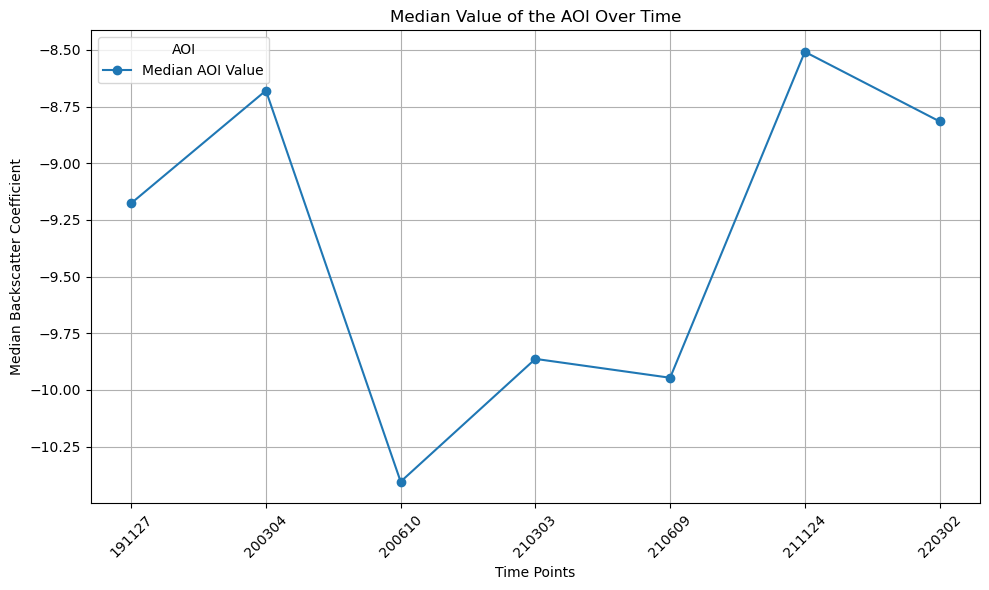

In [16]:
import rasterio.features  # Import features explicitly
import matplotlib.pyplot as plt
import geopandas as gpd

# Load the AOI geometry using geopandas
aoi_gdf = gpd.read_file('aoi_toyota.gpkg')

# Use the transform and spatial shape from one of the images in the stack
transform = images[0].transform
height, width = stacked_data.shape[1], stacked_data.shape[2]  # Spatial dimensions of the stack

# Initialize an empty mask for the entire AOI
combined_mask = np.zeros((height, width), dtype=bool)

# Combine masks for all valid geometries
for geom in aoi_gdf.geometry:
    if geom.is_valid:  # Ensure geometry is valid before processing
        mask = rasterio.features.geometry_mask(
            [geom],
            transform=transform,  # Use the transform from the image stack
            invert=True,          # Invert to select areas inside the geometry
            out_shape=(height, width)  # Match spatial dimensions
        )
        combined_mask = np.logical_or(combined_mask, mask)  # Combine masks

# Compute the median backscatter values for each band (time point)
median_values = []
for band in range(stacked_data.shape[0]):  # Iterate through each band (time layer)
    band_data = stacked_data[band, :, :]  # Extract data for the current band
    # Calculate median value for masked region
    median_value = np.median(band_data[combined_mask])
    median_values.append(median_value)

# Median values plotted as time series
dates = [191127, 200304, 200610, 210303, 210609, 211124, 220302] 
time_points = np.arange(len(dates))  # Use indices for x-axis

plt.figure(figsize=(10, 6))
plt.plot(time_points, median_values, marker='o', label='Median AOI Value')

plt.title('Median Value of the AOI Over Time')
plt.xlabel('Time Points')
plt.ylabel('Median Backscatter Coefficient')
plt.xticks(time_points, labels=dates, rotation=45)  # Display original years as labels
plt.grid()
plt.legend(title='AOI')
plt.tight_layout()
plt.show()
